# MODELO 1 - Avaliação do Modelo de Classificação.
### Introdução.
##### Este  Notebook é destina a avaliação do modelo de regressão logística e separação do das  no arquivo voice_fix.csv


---
---
---
---
---


##  Resumo da análise anterior com base tratada em python da base de propriedades acústicas.

In [1]:
%matplotlib inline

In [2]:
# Importa as bibliotecas
import pandas
import matplotlib.pyplot as plt
import numpy 
#from pandas.tools.plotting import scatter_matrix
from  pandas.plotting  import scatter_matrix
import seaborn as sb
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import Normalizer
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score , roc_curve, auc ,accuracy_score,recall_score, precision_score
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix






In [3]:
url = "C:\\Users\\jorge\\Desktop\\TCC\\tcc_to_git\\tcc\\baseDados\\voice_fix.csv"
colunas = ["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx","label"]
dataset = pandas.read_csv(url, names=colunas , sep = ",")

In [4]:
dataset[["meanfreq","sd","median"]].head(2)

,meanfreq,sd,median
0,0.172557,0.064241,0.176893
1,0.172557,0.067310,0.176893


## 1) Refazendo boxplot.
O BOXPLOT representa os dados através de um retângulo
construído com os quartis e fornece informação sobre valores
extremos. 

In [5]:
## Separação dos dados pela classe label, vozes de homens e mulheres.
dfHomens = dataset[dataset["label"] == "male"]
dfMulheres = dataset[dataset["label"] == "female"]

### Dataframe da classe femele

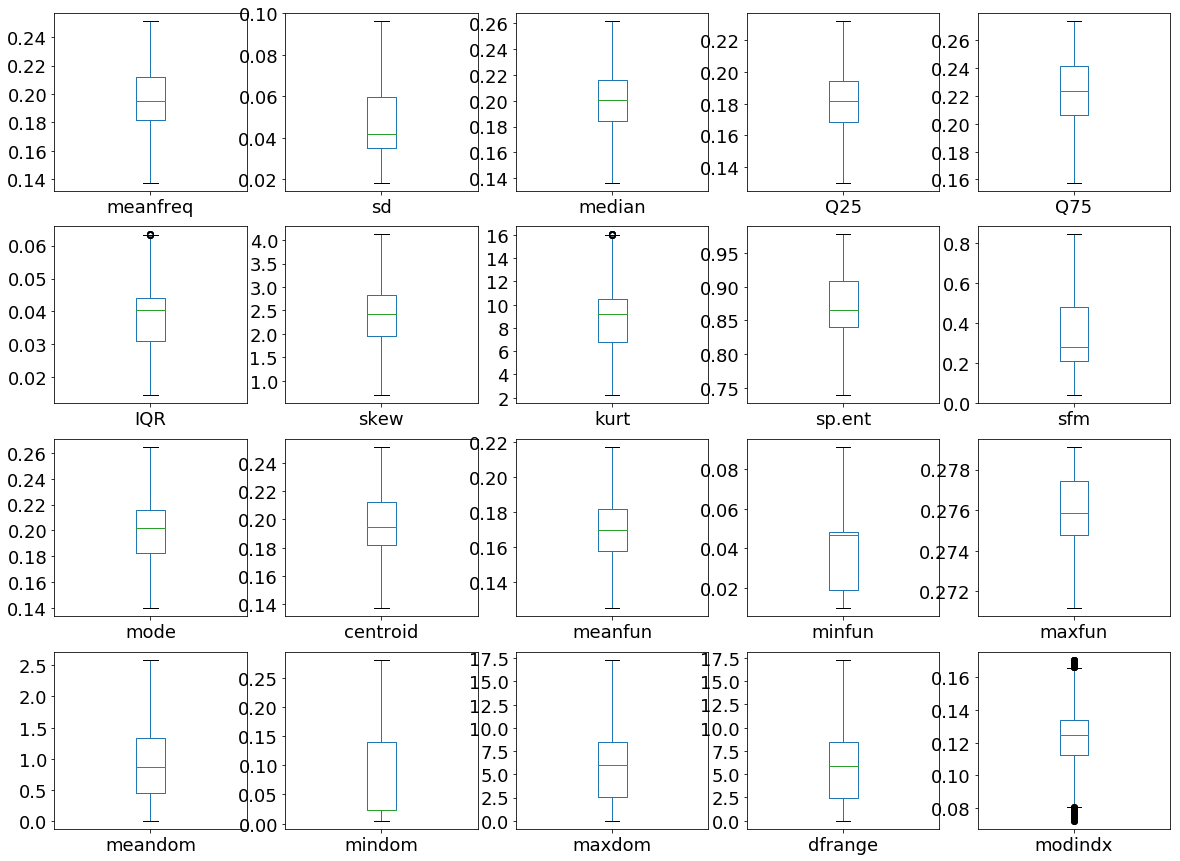

In [6]:
plt.rcParams['figure.figsize'] = (20,15)
dfMulheres[colunas[0:20]].plot(kind='box', subplots=True, layout=(4,5), sharex=False, sharey=False,fontsize=18)
plt.show()

### Dataframe da classe male

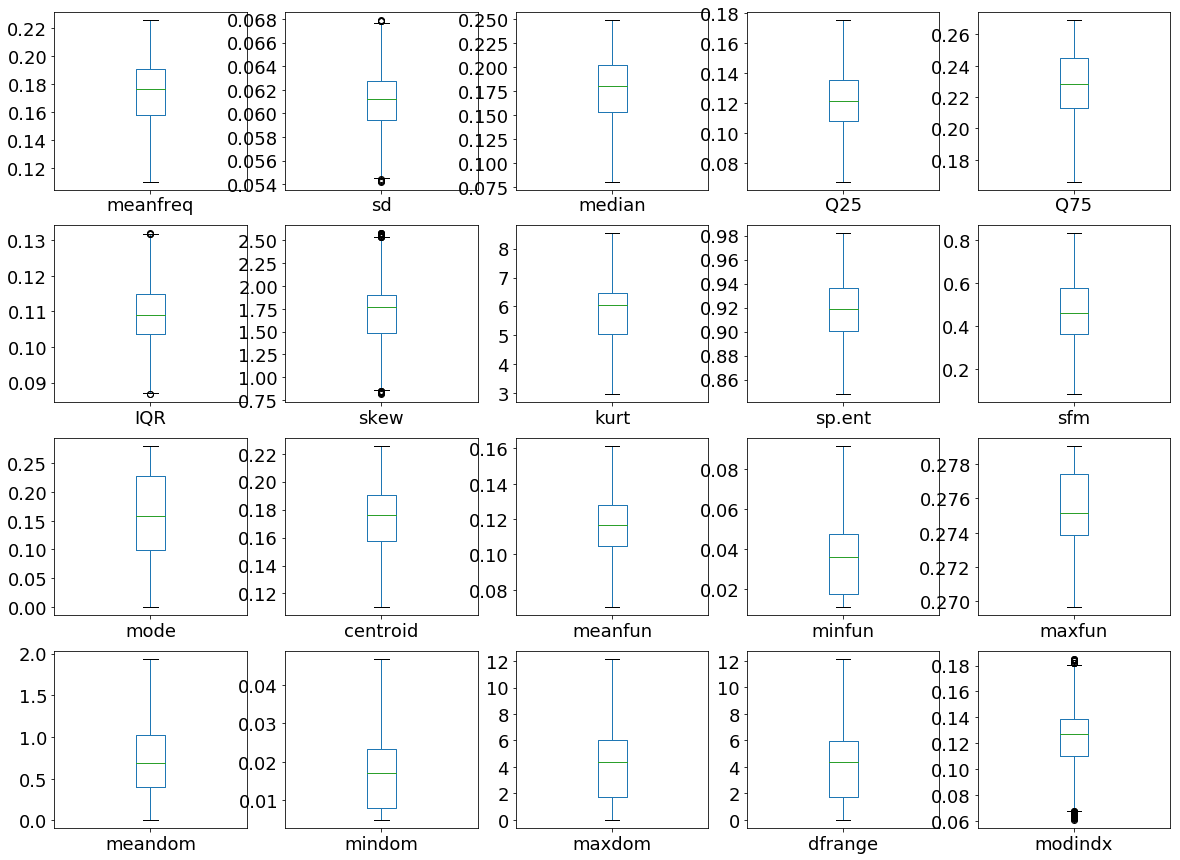

In [7]:
plt.rcParams['figure.figsize'] = (20,15)
dfHomens[colunas[0:20]].plot(kind='box', subplots=True, layout=(4,5), sharex=False, sharey=False,fontsize=18)
plt.show()

## Fim do resumo análise.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score , roc_curve, auc


In [9]:
url = ".\\baseDados\\voice_fix.csv"
colunas = ["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx","label"]
dataset = pandas.read_csv(url, names=colunas , sep = ",")

---


---



---
# Procedimentos de avaliação de modelo
Train/Test Split
K-Fold Cross Validation

##  2)  Preparando a base para usar no modelo de regressão logística.

In [10]:
print(dataset.head(2).transpose())

                  0           1
meanfreq   0.172557    0.172557
sd        0.0642413     0.06731
median     0.176893    0.176893
Q25        0.121089    0.121089
Q75        0.227842    0.227842
IQR        0.109055    0.109055
skew        1.90605     1.90605
kurt        6.45022     6.45022
sp.ent     0.893369    0.892193
sfm        0.491918    0.513724
mode              0           0
centroid   0.172557    0.172557
meanfun   0.0842791    0.107937
minfun    0.0157017   0.0158259
maxfun     0.275862    0.273863
meandom   0.0078125  0.00901442
mindom    0.0078125   0.0078125
maxdom    0.0078125   0.0546875
dfrange           0    0.046875
modindx    0.132999    0.124688
label          male        male


##  3)  Substituindo female=1, male=0 e Adcoinando a coluna gênero para representar a classe como dummy.

In [11]:
df_pre = dataset

df_pre['genero'] = df_pre['label'].replace({'female': 1, 'male': 0})
dataset = df_pre

In [12]:
print(df_pre.head(2).transpose())



#dataset = df_pre

                  0           1
meanfreq   0.172557    0.172557
sd        0.0642413     0.06731
median     0.176893    0.176893
Q25        0.121089    0.121089
Q75        0.227842    0.227842
IQR        0.109055    0.109055
skew        1.90605     1.90605
kurt        6.45022     6.45022
sp.ent     0.893369    0.892193
sfm        0.491918    0.513724
mode              0           0
centroid   0.172557    0.172557
meanfun   0.0842791    0.107937
minfun    0.0157017   0.0158259
maxfun     0.275862    0.273863
meandom   0.0078125  0.00901442
mindom    0.0078125   0.0078125
maxdom    0.0078125   0.0546875
dfrange           0    0.046875
modindx    0.132999    0.124688
label          male        male
genero            0           0


In [13]:
#df =dataset.rename(columns={'label': 'genero'})
print(df_pre.tail(2).transpose())

               3166       3167
meanfreq   0.143659   0.165509
sd        0.0906283  0.0928835
median     0.184976   0.183044
Q25        0.181927   0.181927
Q75        0.219943   0.250827
IQR       0.0412693  0.0412693
skew        1.59106    1.70503
kurt         5.3883    5.76912
sp.ent     0.950436   0.938829
sfm         0.67547   0.601529
mode       0.212202   0.201041
centroid   0.143659   0.165509
meanfun    0.172375   0.185607
minfun    0.0344828  0.0622568
maxfun     0.274763   0.271186
meandom     0.79136   0.227022
mindom    0.0078125  0.0078125
maxdom      3.59375   0.554688
dfrange     3.58594   0.546875
modindx    0.133931   0.133931
label        female     female
genero            1          1


#  4)   Dataset: Train/Test Split para do modelo de regressão logística.
Esse método divide o conjunto de dados em duas partes: um conjunto de treinamento e um conjunto de testes. O conjunto de treinamento é usado para treinar o modelo. Também podemos medir a precisão do modelo no conjunto de treinamento, mas não devemos avaliar modelos com base somente nessa métrica.

Logistic Regression coefficients na formula:
 y=  1 * b0 + b1*X1 + b2*X2+ b3*Xn

 ##   5)  Criando explicitamente  y-intercept: b0. 

In [14]:
df_pre['int']=1
print(df_pre.head().transpose())

                  0           1           2          3          4
meanfreq   0.172557    0.172557    0.172557   0.151228    0.13512
sd        0.0642413     0.06731   0.0635487  0.0612157  0.0627691
median     0.176893    0.176893    0.176893   0.158011   0.124656
Q25        0.121089    0.121089    0.121089  0.0965817  0.0787202
Q75        0.227842    0.227842    0.227842   0.207955   0.206045
IQR        0.109055    0.109055    0.123207   0.111374   0.127325
skew        1.90605     1.90605     1.90605    1.23283    1.10117
kurt        6.45022     6.45022     6.45022     4.1773    4.33371
sp.ent     0.893369    0.892193    0.918553   0.963322   0.971955
sfm        0.491918    0.513724    0.478905   0.727232   0.783568
mode              0           0           0  0.0838782   0.104261
centroid   0.172557    0.172557    0.172557   0.151228    0.13512
meanfun   0.0842791    0.107937   0.0987063  0.0889648   0.106398
minfun    0.0157017   0.0158259   0.0156556  0.0177976  0.0169312
maxfun    

In [15]:
## Separação dos dados pela classe label, vozes de homens e mulheres.
df_male = df_pre[df_pre["label"] == "male"]
df_female = df_pre[df_pre["label"] == "female"]





In [16]:
print(df_male.head().transpose())

                  0           1           2          3          4
meanfreq   0.172557    0.172557    0.172557   0.151228    0.13512
sd        0.0642413     0.06731   0.0635487  0.0612157  0.0627691
median     0.176893    0.176893    0.176893   0.158011   0.124656
Q25        0.121089    0.121089    0.121089  0.0965817  0.0787202
Q75        0.227842    0.227842    0.227842   0.207955   0.206045
IQR        0.109055    0.109055    0.123207   0.111374   0.127325
skew        1.90605     1.90605     1.90605    1.23283    1.10117
kurt        6.45022     6.45022     6.45022     4.1773    4.33371
sp.ent     0.893369    0.892193    0.918553   0.963322   0.971955
sfm        0.491918    0.513724    0.478905   0.727232   0.783568
mode              0           0           0  0.0838782   0.104261
centroid   0.172557    0.172557    0.172557   0.151228    0.13512
meanfun   0.0842791    0.107937   0.0987063  0.0889648   0.106398
minfun    0.0157017   0.0158259   0.0156556  0.0177976  0.0169312
maxfun    

In [17]:
print(df_female.head().transpose())

               1584       1585       1586       1587       1588
meanfreq   0.158108   0.182855   0.199807    0.19528   0.208504
sd        0.0827816  0.0677889  0.0619738  0.0720869  0.0575502
median     0.191191   0.200639   0.211358   0.204656   0.220229
Q25        0.181927   0.175489   0.184422   0.180611   0.190343
Q75        0.224552   0.226068   0.235687   0.255954   0.249759
IQR       0.0412693  0.0505788  0.0512645  0.0403311  0.0594155
skew        2.80134    3.00189    2.54384    2.39233    1.70779
kurt        9.34563    9.34563     14.922    10.0615    5.67091
sp.ent     0.952161   0.910458   0.904432   0.907115   0.879674
sfm        0.679223   0.506099   0.425289   0.524209   0.343548
mode       0.201834   0.201834   0.201834   0.193435   0.201834
centroid   0.158108   0.182855   0.199807    0.19528   0.208504
meanfun    0.185042    0.15959   0.156465   0.182629   0.162043
minfun    0.0230216  0.0187135  0.0161943  0.0249221  0.0168067
maxfun     0.275862   0.275927   0.27592

### Separando X e Y para dataframe_female

In [18]:
X_entrada_female = df_female.drop(columns=['label','genero'])
Y_entrada_female = df_female['genero']


In [19]:
print(X_entrada_female.head().transpose())

feature_cols=X_entrada_female.columns
feature_cols


              1584      1585       1586       1587      1588
meanfreq  0.158108  0.182855   0.199807   0.195280  0.208504
sd        0.082782  0.067789   0.061974   0.072087  0.057550
median    0.191191  0.200639   0.211358   0.204656  0.220229
Q25       0.181927  0.175489   0.184422   0.180611  0.190343
Q75       0.224552  0.226068   0.235687   0.255954  0.249759
IQR       0.041269  0.050579   0.051265   0.040331  0.059416
skew      2.801344  3.001890   2.543841   2.392326  1.707786
kurt      9.345630  9.345630  14.921964  10.061489  5.670912
sp.ent    0.952161  0.910458   0.904432   0.907115  0.879674
sfm       0.679223  0.506099   0.425289   0.524209  0.343548
mode      0.201834  0.201834   0.201834   0.193435  0.201834
centroid  0.158108  0.182855   0.199807   0.195280  0.208504
meanfun   0.185042  0.159590   0.156465   0.182629  0.162043
minfun    0.023022  0.018713   0.016194   0.024922  0.016807
maxfun    0.275862  0.275927   0.275927   0.275862  0.275927
meandom   0.272964  0.25

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'int'],
      dtype='object')

In [20]:
print(Y_entrada_female.head())

1584    1
1585    1
1586    1
1587    1
1588    1
Name: genero, dtype: int64


### Separando X e Y para dataframe_male

In [21]:
X_entrada_male = df_male.drop(columns=['label','genero'])
Y_entrada_male = df_male['genero']

In [22]:
print(X_entrada_male.head().transpose())

                 0         1         2         3         4
meanfreq  0.172557  0.172557  0.172557  0.151228  0.135120
sd        0.064241  0.067310  0.063549  0.061216  0.062769
median    0.176893  0.176893  0.176893  0.158011  0.124656
Q25       0.121089  0.121089  0.121089  0.096582  0.078720
Q75       0.227842  0.227842  0.227842  0.207955  0.206045
IQR       0.109055  0.109055  0.123207  0.111374  0.127325
skew      1.906048  1.906048  1.906048  1.232831  1.101174
kurt      6.450221  6.450221  6.450221  4.177296  4.333713
sp.ent    0.893369  0.892193  0.918553  0.963322  0.971955
sfm       0.491918  0.513724  0.478905  0.727232  0.783568
mode      0.000000  0.000000  0.000000  0.083878  0.104261
centroid  0.172557  0.172557  0.172557  0.151228  0.135120
meanfun   0.084279  0.107937  0.098706  0.088965  0.106398
minfun    0.015702  0.015826  0.015656  0.017798  0.016931
maxfun    0.275862  0.273863  0.271186  0.273863  0.275166
meandom   0.007812  0.009014  0.007990  0.201497  0.7128

In [23]:
print(Y_entrada_male.head())

0    0
1    0
2    0
3    0
4    0
Name: genero, dtype: int64


##  6)  Divisão balanceada de 30% teste e 70%  para o treino.

#### Feito divisão  randômica de 30 test e 70 treino no dataframe_female

In [24]:
X_trainF,X_testF,y_trainF,y_testF = train_test_split(X_entrada_female,Y_entrada_female,test_size=0.30,random_state=0)

#### Feito divisão randômica de 30 test e 70 treino no dataframe_male

In [25]:
X_trainM, X_testM, y_trainM ,y_testM = train_test_split(X_entrada_male,Y_entrada_male,test_size=0.30,random_state=0)

#### Concatenando os datraframes  Após ad divisão dos dados de treino e test  male e frame

In [26]:
X_train_frames = [X_trainF, X_trainM]

In [27]:
X_test_frames = [X_testF,X_testM]

In [28]:
y_test_frames = [y_testF, y_testM]

In [29]:
y_train_frames = [ y_trainF,  y_trainM]

### Convertendo os datraframes  após a divisão dos dados de treino e test  male e frame

In [30]:
X_train = pandas.concat(X_train_frames)

In [31]:
X_test = pandas.concat(X_test_frames)

In [32]:
y_train = pandas.concat(y_train_frames)

In [33]:
y_test = pandas.concat(y_test_frames )

### Mostratandos as dimensãoes dos dados

In [34]:
X_train.shape,X_test.shape , y_train.shape, y_test.shape


dictabela = {}
dictabela['Registros para treino'] = X_train.shape[0]
dictabela['Registros para teste'] = X_test.shape[0]




In [35]:
dftreinoteste = pandas.DataFrame.from_dict(dictabela, orient="index").reset_index()

In [36]:
dftreinoteste =dftreinoteste.rename(columns={'index': 'divisão do dados'})
dftreinoteste =dftreinoteste.rename(columns={0: 'total'})
dftreinoteste


,divisão do dados,total
0,Registros para treino,2216
1,Registros para teste,952


In [37]:
y_train

2858    1
2040    1
2394    1
3133    1
3005    1
       ..
763     0
835     0
1216    0
559     0
684     0
Name: genero, Length: 2216, dtype: int64

### Total de  voz  por classe, masculinas e femininas na base de treino

In [38]:
dfContador =pandas.DataFrame(list(y_train), columns = ['genero'])
contagem = dfContador.groupby('genero').size()
print(contagem)


genero
0    1108
1    1108
dtype: int64


### Total de  voz  por classe, masculinas e femininas na base de teste

In [39]:
dfContador =pandas.DataFrame(list(y_test), columns = ['genero'])
contagem = dfContador.groupby('genero').size()
print(contagem)

genero
0    476
1    476
dtype: int64


---
---
---

##  7)  Normalização dos dados por questão de escala.

In [40]:
# Instantiate 
norm = Normalizer()

# Fit
norm.fit(X_train)

# Transform both training and testing sets
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [41]:
X_train_norm.shape , X_test_norm.shape

((2216, 21), (952, 21))

In [42]:
print(X_train_norm)

[[0.01070896 0.0013571  0.01063611 ... 0.4404305  0.00528321 0.04733426]
 [0.01080389 0.002876   0.01080535 ... 0.38455026 0.00730888 0.05951927]
 [0.01542367 0.00236176 0.01535375 ... 0.423673   0.00793265 0.07318508]
 ...
 [0.01959029 0.00592508 0.02281332 ... 0.490609   0.00824204 0.09827536]
 [0.01287192 0.00626938 0.011102   ... 0.49688596 0.01353424 0.10176224]
 [0.02327679 0.00906603 0.02096434 ... 0.10766927 0.02109371 0.15207357]]



#  8)  Salva dados de treino e teste em um dicionario serializado.

In [43]:
dic_base_treino_test = {}

In [44]:
dic_base_treino_test['y_train'] = y_train

In [45]:
dic_base_treino_test['y_test'] = y_test

In [46]:
dic_base_treino_test['X_train_norm'] = X_train_norm

In [47]:
dic_base_treino_test['X_test_norm'] = X_test_norm
dic_base_treino_test['feature_cols'] =  feature_cols

### Salva dados para avaliação dos modelo

In [48]:
try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle

In [49]:
output = ".\\baseDados\\voice_treino_test.pk"
with open(output, 'wb') as pickle_file:
    pickle.dump(dic_base_treino_test, pickle_file)


---
---
---
---
---

#  9) Carregando dados para avalição do modelo

In [50]:
try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle

In [51]:
dic_base_treino_file = pickle.load(open( output, "rb" ))

In [52]:
#print(dic_base_treino_file)

In [53]:
y_train = dic_base_treino_file['y_train'] 

In [54]:
 y_test = dic_base_treino_file['y_test'] 

In [55]:
 X_train = dic_base_treino_file['X_train_norm']

In [56]:
X_test = dic_base_treino_file['X_test_norm']

In [57]:
dfContador =pandas.DataFrame(list(y_train), columns = ['genero'])
contagem = dfContador.groupby('genero').size()
print(contagem)

genero
0    1108
1    1108
dtype: int64


In [58]:
dfContador =pandas.DataFrame(list(y_test), columns = ['genero'])
contagem = dfContador.groupby('genero').size()
print(contagem)

genero
0    476
1    476
dtype: int64


---


#  10)  Declarando o modelo.

In [59]:
#logistic Regression
classifier = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')

#  11) Treinamento e teste do modelo.

In [60]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
y_pred=classifier.predict(X_test)

---

# 12) Modelo de avaliação de métricas.

##  16)  Classificação

###  Matriz de confusão.
Uma matriz de confusão pode ser definida livremente como uma tabela que descreve o desempenho de um modelo de classificação em um conjunto de dados de teste para os quais os valores verdadeiros são conhecidos.

In [62]:
cm=confusion_matrix(y_test,y_pred)


In [63]:
confusion_matrix_lda = pandas.DataFrame(cm, index = ['Negativos','Positivos'], columns = ['Previsão dos negativos','Previsão dos positivos'] )
confusion_matrix_lda['Total'] = 1
confusion_matrix_lda['Total'][0] = cm[0][0] + cm[0][1]
confusion_matrix_lda['Total'][1] = cm[1][0] + cm[1][1]

In [64]:
confusion_matrix_lda

,Previsão dos negativos,Previsão dos positivos,Total
Negativos,406,70,476
Positivos,91,385,476


In [65]:
print(confusion_matrix_lda)

           Previsão dos negativos  Previsão dos positivos  Total
Negativos                     406                      70    476
Positivos                      91                     385    476


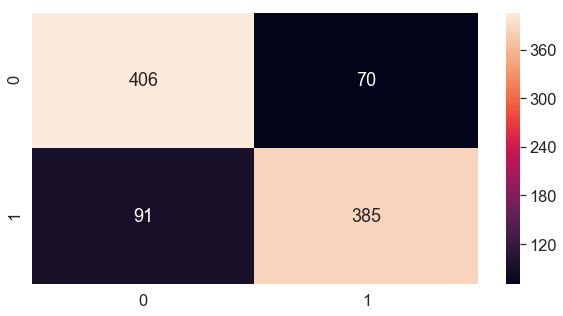

In [66]:
#Plot the confusion matrix
plt.rcParams['figure.figsize'] = (10,5)
sb.set(font_scale=1.5)
sb.heatmap(cm, annot=True, fmt='g')
plt.show()

---

### True Positives:TP
Este valor indica a quantidade de registros que foram classificados como positivos corretamente, ou seja, a resposta do classificador foi que o comentário era positivo e o comentário realmente era positivo.

In [67]:
TP = confusion_matrix_lda['Previsão dos positivos'][1]
dfTP = pandas.DataFrame(TP, index = ['Positivos verdadeiros'], columns = ['Quantidade acertos'] )

In [68]:
dfTP

,Quantidade acertos
Positivos verdadeiros,385


In [69]:
print(dfTP)

                       Quantidade acertos
Positivos verdadeiros                 385


---

### True Negatives:TN
Este valor indica a quantidade de registros que foram classificados como negativos de maneira correta, ou seja, a resposta do classificador foi que o comentário era negativo e o comentário realmente era negativo.

In [70]:
TN = confusion_matrix_lda['Previsão dos negativos'][0]
dfTN = pandas.DataFrame(TN, index = ['Verdadeiro Negativo'], columns = ['Quantidade acertos'] )

In [71]:
dfTN

,Quantidade acertos
Verdadeiro Negativo,406


In [72]:
print(dfTN)

                     Quantidade acertos
Verdadeiro Negativo                 406


---

### Falso Positivos - False Positives:FP
Este valor indica a quantidade de registros que foram classificados como comentários positivos de maneira incorreta, ou seja, a resposta do classificador foi que o comentário era positivo, mas o comentário era negativo.

In [73]:
FP = confusion_matrix_lda['Previsão dos positivos'][0]
dfFP = pandas.DataFrame(FP, index = ['Falso Positivo'], columns = ['Quantidade acertos'] )

In [74]:
dfFP

,Quantidade acertos
Falso Positivo,70


In [75]:
print(dfFP)

                Quantidade acertos
Falso Positivo                  70


---

### False Negatives:FN
Este valor indica a quantidade de registros que foram classificados como comentários negativos de maneira incorreta, ou seja, a resposta do classificador foi que o comentário era negativo, mas o comentário era positivo.

In [76]:
FN = confusion_matrix_lda['Previsão dos negativos'][1]
dfFN = pandas.DataFrame(FN, index = ['Negativos Falsos'], columns = ['Quantidade acertos'] )

In [77]:
dfFN

,Quantidade acertos
Negativos Falsos,91


In [78]:
print(dfFN)

                  Quantidade acertos
Negativos Falsos                  91


---

### Especificidade (Specificity)
Especificidade é a proporção de previsões negativas corretas para o total não de previsões negativas. Isso determina o grau de especificidade do classificador na previsão de instâncias positivas.

Specificity = (Numero de previsões negativas correta) / (Total do Numero Negativas prevista)

TN = / TN + FP

In [79]:
Specificity = TN / float(TN + FP)
dfSpecificity = pandas.DataFrame(Specificity, index = ['Specificity'], columns = ['resultado'] )

In [80]:
dfSpecificity

,resultado
Specificity,0.852941


In [81]:
print(dfSpecificity)

             resultado
Specificity   0.852941


---

### Precisão Geral (Accuracy)
A precisão da classificação é a proporção de previsões corretas para o total não  de previsões. 

Accuracy = (numero de predições corretas / numero de predições)

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In [82]:
#trés maneiras de fazer o caluclo
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, y_pred))
print("Accuracy ", classifier.score(X_test, y_test)*100)
Accuracy= classifier.score(X_test, y_test)

0.8308823529411765
0.8308823529411765
Accuracy  83.08823529411765


In [83]:
dfAccuracy = pandas.DataFrame(Accuracy, index = ['Accuracy'], columns = ['resultado'] )
dfAccuracy

,resultado
Accuracy,0.830882


In [84]:
print(dfAccuracy)

          resultado
Accuracy   0.830882


---

### Sensibilidade ou recordação Recall




Sensibilidade ou recordação é a razão de previsões positivas corretas para o total não de previsões positivas, ou, mais simplesmente, quão sensível o classificador é para detectar instâncias positivas. Isso também é chamado de True Positive Rate

Recall = (Numero de positivas previstas corretamente) /( total de Predições positivas)

$$Recall = \frac{TP}{TP +FN}$$


In [85]:
print(TP / float(TP + FN))
print(recall_score(y_test, y_pred))
Recall= recall_score(y_test, y_pred)

0.8088235294117647
0.8088235294117647


In [86]:
dfRecall = pandas.DataFrame(Recall, index = ['Sensibilidade-Recall'], columns = ['resultado'] )
dfRecall

,resultado
Sensibilidade-Recall,0.808824


In [87]:
print(dfRecall)

                      resultado
Sensibilidade-Recall   0.808824


---

## Taxa positiva falsa (False Positive Rate)
A *false positive rate*, é a proporção de previsões negativas que foram determinadas como positivas para o número total de previsões negativas ou quando o valor real é negativo, com que frequência a previsão é incorreta.

FalsePositveRate = Números de falsos positivos / Total de predições negativas


$$FalsePositveRate = \frac{FP}{ TN + FP}$$


In [88]:
print(FP / float(TN + FP))
FalsePositveRate = FP / float(TN + FP)

0.14705882352941177


In [89]:
dfFalsePositveRate = pandas.DataFrame(FalsePositveRate, index = ['Taxa de Falso Positvo'], columns = ['resultado'] )
dfFalsePositveRate

,resultado
Taxa de Falso Positvo,0.147059


In [90]:
print(dfFalsePositveRate)

                       resultado
Taxa de Falso Positvo   0.147059


---
### Precisão (Precision)
A precisão é a proporção de previsões corretas para o total  de não previsões preditas corretas. Isso mede a precisão do classificador ao prever instâncias positivas.

Precision = Número de positivas verdadeiras / Numero total de predicados positivos

$$Precision = \frac{TP} {TP + FP}$$

In [91]:
print(TP / float(TP + FP))
print(precision_score(y_test, y_pred))
Precision = precision_score(y_test, y_pred)

0.8461538461538461
0.8461538461538461


In [92]:
dfPrecision = pandas.DataFrame(Precision, index = ['Precisão'], columns = ['resultado'] )
dfPrecision

,resultado
Precisão,0.846154


In [93]:
print(dfPrecision)

          resultado
Precisão   0.846154


---

### F1 Score
O F1 Score é uma média harmônica entre precisão (que, apesar de ter o mesmo nome, não é a mesma citada acima) e recall. Veja abaixo as definições destes dois termos.

Ela é muito boa quando você possui um dataset com classes desproporcionais, e o seu modelo não emite probabilidades. Em geral, quanto maior o F1 score, melhor.



$$F1Score = \frac{2 \times Precisão \times Recall }{Precisão + Recall}$$


In [94]:
F1Score = 2 * Precision *  Recall /  Precision + Recall

In [95]:
print(F1Score)


2.4264705882352944


In [96]:
dfF1Score = pandas.DataFrame(F1Score, index = ['F1 Score'], columns = ['resultado'] )
dfF1Score

,resultado
F1 Score,2.426471


In [97]:
print(dfF1Score)

          resultado
F1 Score   2.426471


---
### 13) Curva ROC
Uma curva ROC é uma forma comumente usada para visualizar o desempenho de um classificador binário, significando um classificador com duas classes de saída possíveis. A curva plota a Taxa Positiva Real (Recall) contra a Taxa Falsa Positiva (também interpretada como Especificidade 1).

In [98]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa de falsos positivos')
    plt.ylabel('Taxa de verdadeiros positivos')
    plt.title('Curva ROC:Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

#### Calcula a propabildade de previsão.

In [99]:
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

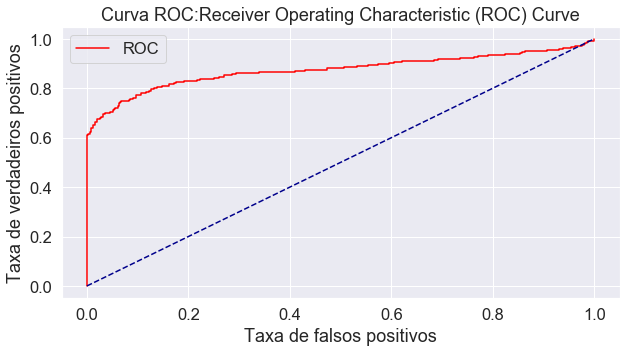

In [101]:
plot_roc_curve(fpr, tpr)

---

### AUC (área sob a curva) da Curva ROC
AUC ou Area Under the Curve é a porcentagem do gráfico do ROC que está abaixo da curva. AUC é útil como um único número de resumo do desempenho do classificador.

In [102]:
print(roc_auc_score(y_test, y_pred_prob))
Auc=roc_auc_score(y_test, y_pred_prob)

0.873181625591413


In [103]:
dfAuc = pandas.DataFrame(Auc, index = ['AUC'], columns = ['resultado'] )
dfAuc

,resultado
AUC,0.873182


In [104]:
print(dfAuc)

     resultado
AUC   0.873182


# Salva dados para usar no gráfico consolidado.

In [105]:
dic_logist={}

In [106]:
dic_logist['Accuracy']=Accuracy
dic_logist['Auc']=Auc
dic_logist['y_pred_prob']=y_pred_prob
dic_logist['y_test']=y_test




In [107]:
#dic_logist

In [108]:
import pickle

In [109]:
filename = '.\\baseDados\\regressaologitica.jss'
outfile = open(filename,'wb')
pickle.dump(dic_logist,outfile)
outfile.close()

In [110]:
infile = open(filename,'rb')
test_dict = pickle.load(infile)
infile.close()

In [111]:
#print(test_dict)


In [112]:
print(type(test_dict))

<class 'dict'>


# Fim de avaliação individual do modelo regressão logística

---
---
---
---
---